In [1]:
import os
import yaml
import pandas as pd
import sqlalchemy

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display 
pd.options.display.max_columns = None
%matplotlib inline

In [2]:
def connect(poolclass=sqlalchemy.pool.QueuePool):
    with open(os.path.join(os.path.join('../..', 'config'), 'db_default_profile.yaml')) as fd:
        config = yaml.load(fd)
        dburl = sqlalchemy.engine.url.URL(
            "postgres",
            host=config["host"],
            username=config["user"],
            database=config["db"],
            password=config["pass"],
            port=config["port"],
        )
        return sqlalchemy.create_engine(dburl, poolclass=poolclass)

conn = connect()

/home/krodolfa/.pyenv/versions/joco-venv-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
import RecallAdjuster as ra

In [238]:
from importlib import reload
reload(ra)

<module 'RecallAdjuster' from '/mnt/data/criminal_justice/johnson_county_ddj/krodolfa/code/johnson-county-ddj/data_exploration/kit_bias_testbed/RecallAdjuster.py'>

In [209]:
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=[('2017-04-01', '2018-04-01')],
        list_sizes=500,
        #entity_demos='joco',
        entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way'
)

In [210]:
myRA.composite_results.head()

,past_train_end_time,future_train_end_time,list_size,num_selected,metric,parameter,value,max_recall_ratio,recall_w_to_b,recall_w_to_h,recall_b_to_w,recall_b_to_h,recall_h_to_w,recall_h_to_b
0,2017-04-01,2018-04-01,500,500,precision@,500_abs,0.556,1.082611,1.033713,0.954833,0.967387,0.923693,1.047304,1.082611


Date Pair: ('2017-04-01', '2018-04-01')
List Size: 500
Metric: precision@500_abs


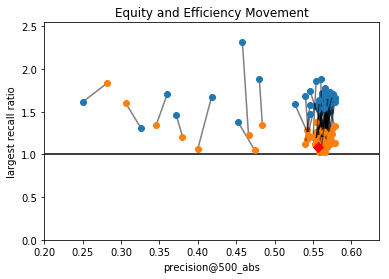

In [211]:
ax_dict = myRA.plot()
# ax = ax_dict['largest']
# plt.sca(ax)
# ax.set_xlim((0.52,0.60))
# ax.set_ylim((0,2.0))
# plt.show()

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 500
Metric: precision@500_abs


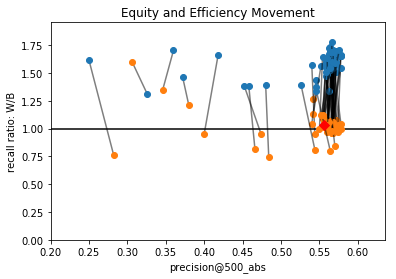

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 500
Metric: precision@500_abs


{'W_to_H': <matplotlib.axes._subplots.AxesSubplot at 0x7f251adb0240>}

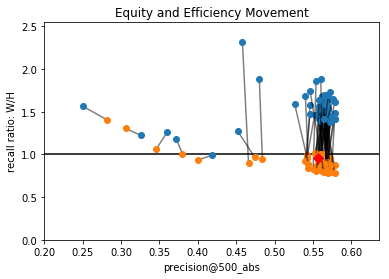

In [212]:
myRA.plot(recall_ratio='W_to_B')
plt.show()
myRA.plot(recall_ratio='W_to_H')

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 500
Metric: precision@500_abs


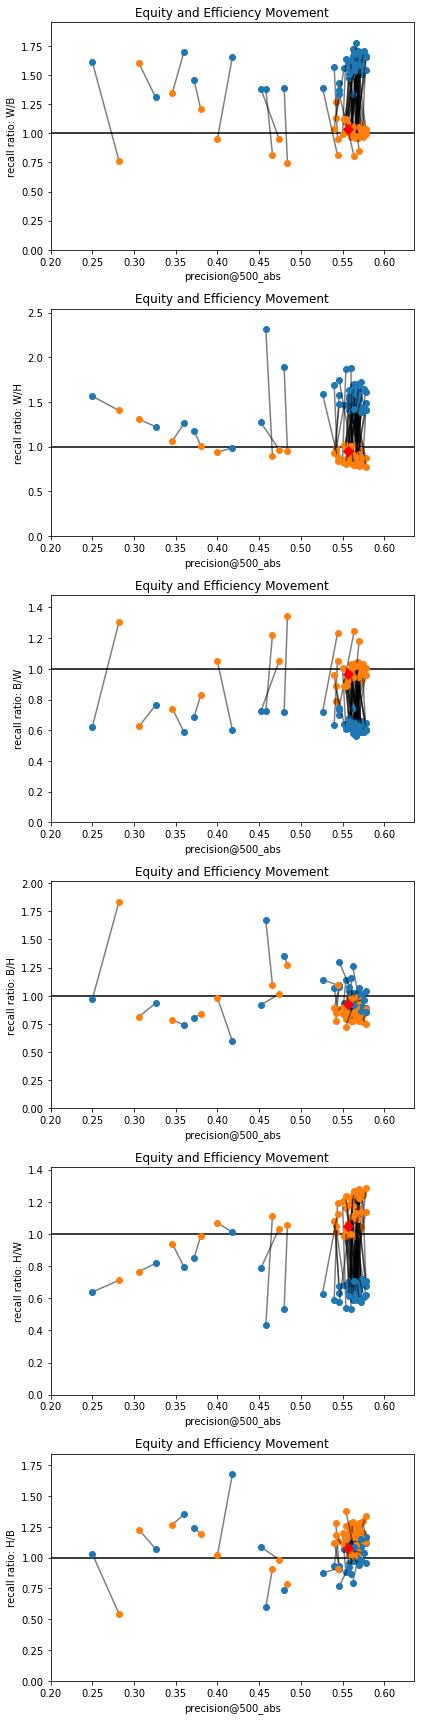

In [213]:
ax_dict = myRA.plot(recall_ratio='all_demos')

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 750
Metric: precision@750_abs


{'largest': <matplotlib.axes._subplots.AxesSubplot at 0x7f2516457f98>}

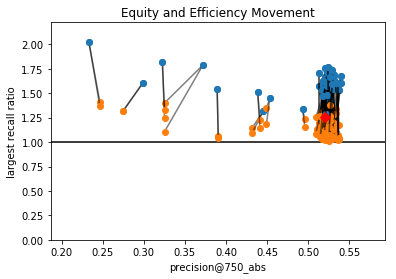

In [215]:
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=[('2016-04-01', '2017-04-01'), ('2017-04-01', '2018-04-01')],
        list_sizes=[500, 750],
        entity_demos='joco',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way'
)

myRA.plot(plot_type='shift', )

Date Pair: ('2016-04-01', '2017-04-01')
List Size: 500
Metric: precision@500_abs


{'largest': <matplotlib.axes._subplots.AxesSubplot at 0x7f251ad738d0>}

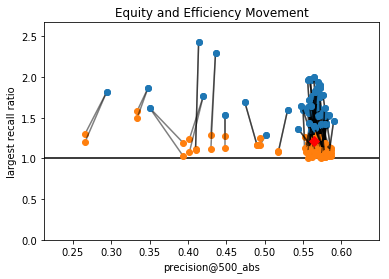

In [216]:
myRA.plot(date_pair=('2016-04-01', '2017-04-01'), list_size=500)

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 750
Metric: precision@750_abs


{'largest': <matplotlib.axes._subplots.AxesSubplot at 0x7f251cf9cc88>}

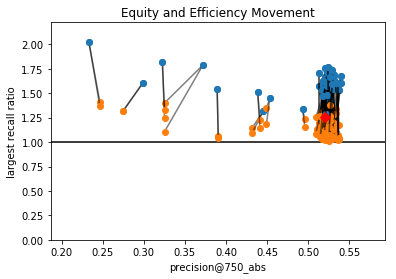

In [217]:
myRA.plot(list_size=750)

Date Pair: ('2017-04-01', '2018-04-01')
List Size: 750
Metric: precision@750_abs


(0.5, 0.55)

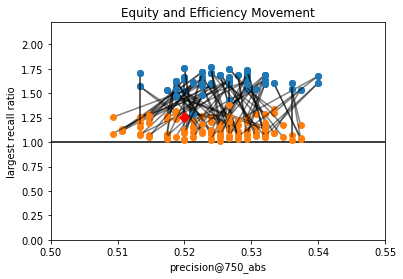

In [219]:
axd = myRA.plot(list_size=750)
axd['largest'].set_xlim((0.50,0.55))

In [221]:
myRA.adjustment_results.head()

,model_id,model_group_id,train_end_time,list_size,past_train_end_time,metric,parameter,base_value,base_max_recall_ratio,base_recall_w_to_b,base_recall_w_to_h,base_recall_b_to_w,base_recall_b_to_h,base_recall_h_to_w,base_recall_h_to_b,adj_value,adj_max_recall_ratio,adj_recall_w_to_b,adj_recall_w_to_h,adj_recall_b_to_w,adj_recall_b_to_h,adj_recall_h_to_w,adj_recall_h_to_b,value_diff,recall_ratio_diff
0,203556,59593,2017-04-01,500,2016-04-01,precision@,500_abs,0.560000,1.964310,1.964310,1.417334,0.509085,0.721543,0.705550,1.385919,0.564000,1.123380,1.123380,1.006221,0.890171,0.895708,0.993818,1.116435,0.004,-0.840930
1,203556,59593,2017-04-01,500,2016-04-01,precision@,500_abs,0.560000,1.964310,1.964310,1.417334,0.509085,0.721543,0.705550,1.385919,0.564000,1.082099,1.060054,0.979628,0.943348,0.924130,1.020796,1.082099,0.004,-0.882211
2,203556,59593,2017-04-01,750,2016-04-01,precision@,750_abs,0.510667,1.523706,1.490868,1.523706,0.670750,1.022026,0.656295,0.978449,0.514667,1.123380,1.123380,1.006221,0.890171,0.895708,0.993818,1.116435,0.004,-0.400326
3,203556,59593,2017-04-01,750,2016-04-01,precision@,750_abs,0.510667,1.523706,1.490868,1.523706,0.670750,1.022026,0.656295,0.978449,0.514667,1.082099,1.060054,0.979628,0.943348,0.924130,1.020796,1.082099,0.004,-0.441607
4,203557,59589,2017-04-01,500,2016-04-01,precision@,500_abs,0.570000,1.937920,1.937920,1.584079,0.516017,0.817412,0.631282,1.223373,0.580000,1.085358,1.067772,0.983797,0.936530,0.921355,1.016470,1.085358,0.010,-0.852561


In [227]:
myRA.adjustment_results.loc[myRA.adjustment_results['base_value'] >= 0.5, ].groupby(['train_end_time', 'list_size'])[['base_value', 'adj_value', 'base_max_recall_ratio', 'adj_max_recall_ratio']].mean()

base_value  adj_value  base_max_recall_ratio  \
train_end_time list_size                                                 
2017-04-01     500          0.565786   0.567679               1.634611   
               750          0.522543   0.526395               1.520233   
2018-04-01     500          0.563500   0.562250               1.638623   
               750          0.525479   0.524145               1.621934   

                          adj_max_recall_ratio  
train_end_time list_size                        
2017-04-01     500                    1.094202  
               750                    1.092162  
2018-04-01     500                    1.138926  
               750                    1.137910

In [224]:
myRA.composite_results[['future_train_end_time', 'list_size', 'value', 'max_recall_ratio']]

,future_train_end_time,list_size,value,max_recall_ratio
0,2017-04-01,500,0.564000,1.208902
1,2017-04-01,750,0.541333,1.026448
2,2018-04-01,500,0.558000,1.121276
3,2018-04-01,750,0.520000,1.259674


In [233]:
pre_dates = range(2014,2018,1)
post_dates = range(2015,2019,1)

date_pairs = []
for pre, post in zip(pre_dates, post_dates):
    mkdt = lambda x: f'{x}-04-01'
    date_pairs.append((mkdt(pre), mkdt(pre)))
    date_pairs.append((mkdt(pre), mkdt(post)))

date_pairs

[('2014-04-01', '2014-04-01'),
 ('2014-04-01', '2015-04-01'),
 ('2015-04-01', '2015-04-01'),
 ('2015-04-01', '2016-04-01'),
 ('2016-04-01', '2016-04-01'),
 ('2016-04-01', '2017-04-01'),
 ('2017-04-01', '2017-04-01'),
 ('2017-04-01', '2018-04-01')]

In [239]:
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='joco',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way'
)

In [240]:
myRA.composite_results

,past_train_end_time,future_train_end_time,list_size,num_selected,metric,parameter,value,max_recall_ratio,recall_w_to_b,recall_w_to_h,recall_b_to_w,recall_b_to_h,recall_h_to_w,recall_h_to_b
0,2014-04-01,2014-04-01,500,500,precision@,500_abs,0.566,1.007439,1.003802,1.007439,0.996212,1.003623,0.992616,0.996390
1,2014-04-01,2015-04-01,500,500,precision@,500_abs,0.518,1.301057,0.943479,1.227521,1.059907,1.301057,0.814650,0.768606
2,2015-04-01,2015-04-01,500,500,precision@,500_abs,0.548,1.002786,0.997222,0.998033,1.002786,1.000813,1.001971,0.999187
3,2015-04-01,2016-04-01,500,500,precision@,500_abs,0.550,1.317194,1.015667,1.317194,0.984574,1.296875,0.759190,0.771084
4,2016-04-01,2016-04-01,500,500,precision@,500_abs,0.594,1.030093,0.996758,1.026753,1.003253,1.030093,0.973944,0.970787
5,2016-04-01,2017-04-01,500,500,precision@,500_abs,0.564,1.208902,1.037178,1.208902,0.964155,1.165569,0.827197,0.857950
6,2017-04-01,2017-04-01,500,500,precision@,500_abs,0.598,1.005113,0.995850,0.994913,1.004168,0.999059,1.005113,1.000942
7,2017-04-01,2018-04-01,500,500,precision@,500_abs,0.566,1.047304,0.974979,0.954833,1.025663,0.979337,1.047304,1.021099


In [241]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM kit_bias_class_test.model_adjustment_results_race_3way
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_b AS recall_w_to_b,
       r.base_recall_w_to_h AS recall_w_to_h,
       r.base_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_b AS recall_w_to_b,
       r.adj_recall_w_to_h AS recall_w_to_h,
       r.adj_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_b AS recall_w_to_b,
       r.adj_recall_w_to_h AS recall_w_to_h,
       r.adj_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      future_train_end_time AS train_end_time, past_train_end_time,
      list_size, metric, parameter,
      value,
      max_recall_ratio,
      recall_w_to_b,
      recall_w_to_h,
      recall_b_to_h
FROM kit_bias_class_test.composite_results_race_3way
WHERE future_train_end_time > past_train_end_time
;
"""

ts_df = pd.read_sql(sql, conn)

In [243]:
import seaborn as sns

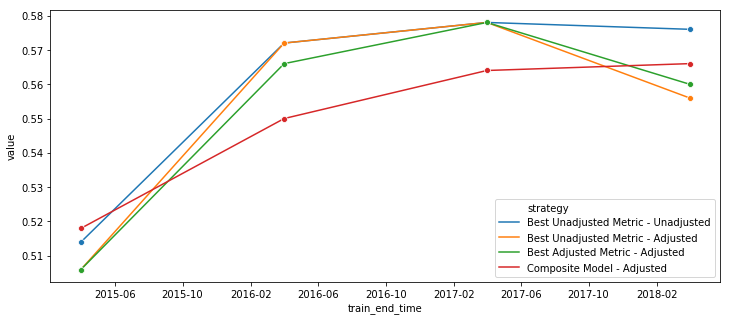

In [255]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax)

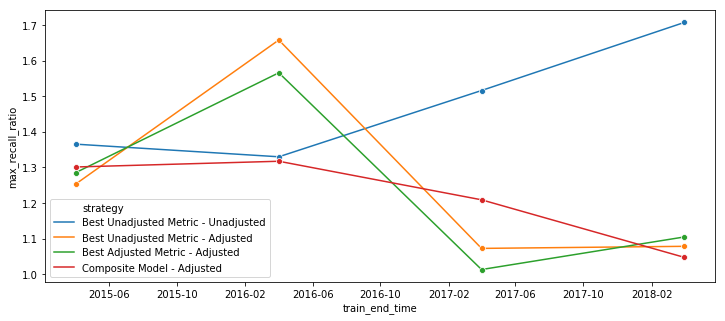

In [256]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='max_recall_ratio', hue='strategy', marker="o", ax=ax)

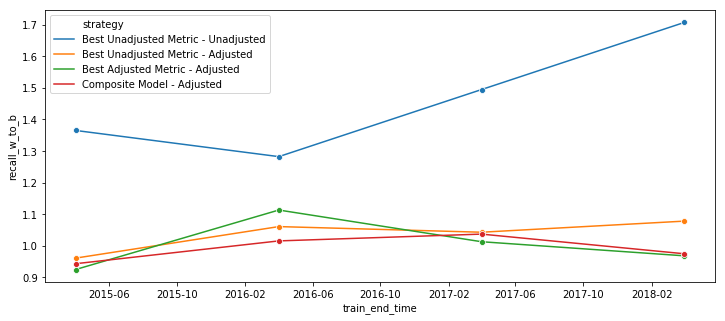

In [257]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

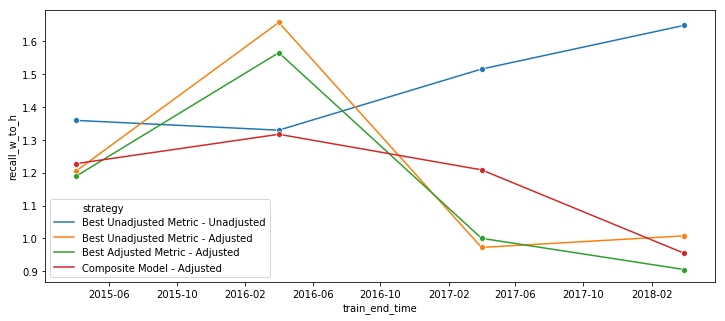

In [258]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

In [289]:
import datetime
from dateutil.relativedelta import relativedelta
base = datetime.datetime.strptime('2018-04-01', '%Y-%m-%d')
date_pairs = []
for x in range(9,-1,-1):
    date_pairs.append(
        (
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d')
        )
    )
    date_pairs.append(
        (
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=4*x)).strftime('%Y-%m-%d')
        )
    )
date_pairs

[('2014-04-01', '2014-04-01'),
 ('2014-04-01', '2015-04-01'),
 ('2014-08-01', '2014-08-01'),
 ('2014-08-01', '2015-08-01'),
 ('2014-12-01', '2014-12-01'),
 ('2014-12-01', '2015-12-01'),
 ('2015-04-01', '2015-04-01'),
 ('2015-04-01', '2016-04-01'),
 ('2015-08-01', '2015-08-01'),
 ('2015-08-01', '2016-08-01'),
 ('2015-12-01', '2015-12-01'),
 ('2015-12-01', '2016-12-01'),
 ('2016-04-01', '2016-04-01'),
 ('2016-04-01', '2017-04-01'),
 ('2016-08-01', '2016-08-01'),
 ('2016-08-01', '2017-08-01'),
 ('2016-12-01', '2016-12-01'),
 ('2016-12-01', '2017-12-01'),
 ('2017-04-01', '2017-04-01'),
 ('2017-04-01', '2018-04-01')]

In [290]:
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='joco',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way'
)

In [291]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM kit_bias_class_test.model_adjustment_results_race_3way
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_b AS recall_w_to_b,
       r.base_recall_w_to_h AS recall_w_to_h,
       r.base_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_b AS recall_w_to_b,
       r.adj_recall_w_to_h AS recall_w_to_h,
       r.adj_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_b AS recall_w_to_b,
       r.adj_recall_w_to_h AS recall_w_to_h,
       r.adj_recall_b_to_h AS recall_b_to_h
FROM kit_bias_class_test.model_adjustment_results_race_3way r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      future_train_end_time AS train_end_time, past_train_end_time,
      list_size, metric, parameter,
      value,
      max_recall_ratio,
      recall_w_to_b,
      recall_w_to_h,
      recall_b_to_h
FROM kit_bias_class_test.composite_results_race_3way
WHERE future_train_end_time > past_train_end_time
;
"""

ts_df = pd.read_sql(sql, conn)

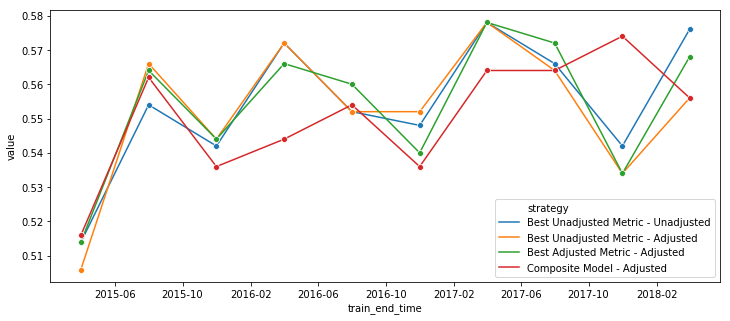

In [292]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax)

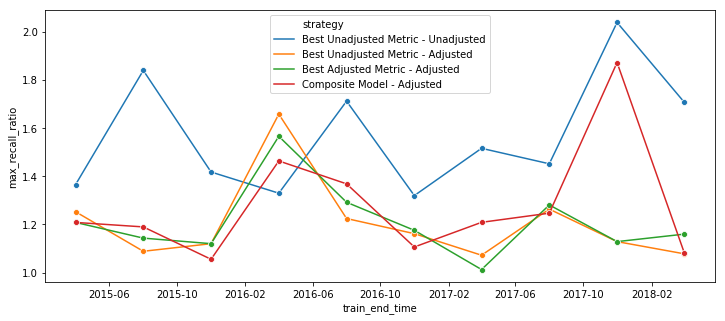

In [293]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='max_recall_ratio', hue='strategy', marker="o", ax=ax)

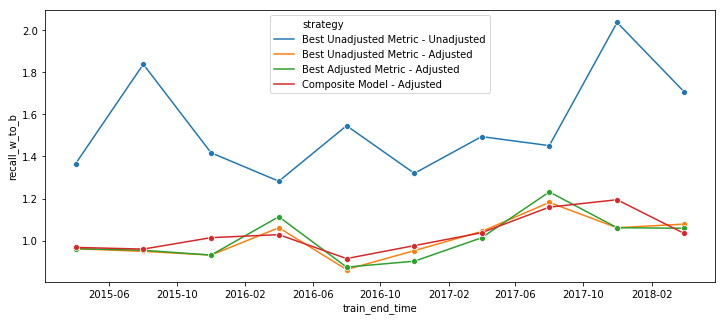

In [295]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

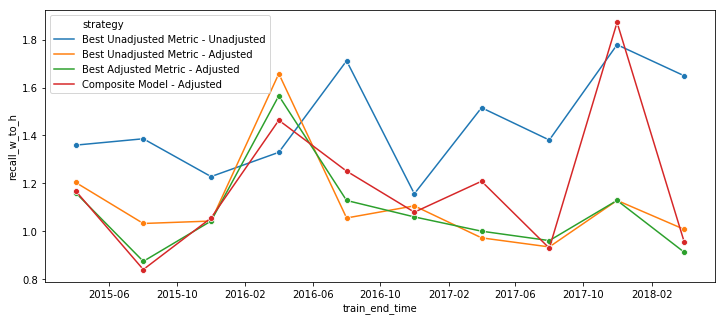

In [296]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df, x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

In [299]:
ts_df.groupby(['strategy']).describe()

list_size                            \
                                        count   mean  std    min    25%   
strategy                                                                  
Best Adjusted Metric - Adjusted          10.0  500.0  0.0  500.0  500.0   
Best Unadjusted Metric - Adjusted        10.0  500.0  0.0  500.0  500.0   
Best Unadjusted Metric - Unadjusted      10.0  500.0  0.0  500.0  500.0   
Composite Model - Adjusted               10.0  500.0  0.0  500.0  500.0   

                                                         max_recall_ratio  \
                                       50%    75%    max            count   
strategy                                                                    
Best Adjusted Metric - Adjusted      500.0  500.0  500.0             10.0   
Best Unadjusted Metric - Adjusted    500.0  500.0  500.0             10.0   
Best Unadjusted Metric - Unadjusted  500.0  500.0  500.0             10.0   
Composite Model - Adjusted           500.0  500.0  500.0             10.0   

                                                                             \
                                         mean       std       min       25%   
strategy                                                                      
Best Adjusted Metric - Adjusted      1.208864  0.148992  1.013057  1.132520   
Best Unadjusted Metric - Adjusted    1.204964  0.174185  1.072437  1.096690   
Best Unadjusted Metric - Unadjusted  1.569565  0.243270  1.319834  1.378335   
Composite Model - Adjusted           1.280270  0.242757  1.055597  1.127415   

                                                                   \
                                          50%       75%       max   
strategy                                                            
Best Adjusted Metric - Adjusted      1.167844  1.262900  1.565657   
Best Unadjusted Metric - Adjusted    1.145405  1.245814  1.657754   
Best Unadjusted Metric - Unadjusted  1.483783  1.710427  2.038014   
Composite Model - Adjusted           1.208705  1.338087  1.871681   

                                    recall_b_to_h                      \
                                            count      mean       std   
strategy                                                                
Best Adjusted Metric - Adjusted              10.0  1.081427  0.197529   
Best Unadjusted Metric - Adjusted            10.0  1.113365  0.212743   
Best Unadjusted Metric - Unadjusted          10.0  0.944037  0.102801   
Composite Model - Adjusted                   10.0  1.148301  0.249757   

                                                                             \
                                          min       25%       50%       75%   
strategy                                                                      
Best Adjusted Metric - Adjusted      0.780621  0.934684  1.092156  1.200317   
Best Unadjusted Metric - Adjusted    0.791315  0.967113  1.104568  1.208962   
Best Unadjusted Metric - Unadjusted  0.753750  0.873698  0.958617  1.009615   
Composite Model - Adjusted           0.802008  0.953080  1.136077  1.328496   

                                              recall_w_to_b            \
                                          max         count      mean   
strategy                                                                
Best Adjusted Metric - Adjusted      1.406250          10.0  1.009810   
Best Unadjusted Metric - Adjusted    1.562500          10.0  1.007903   
Best Unadjusted Metric - Unadjusted  1.106716          10.0  1.546203   
Composite Model - Adjusted           1.567248          10.0  1.028264   

                                                                             \
                                          std       min       25%       50%   
strategy                                                                      
Best Adjusted Metric - Adjusted      0.108938  0.873549  0.936527  0.987150   
Best Unadjusted Metric - Adjusted    0

In [302]:
reload(ra)
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=date_pairs,
        list_sizes=[500],
        #entity_demos='joco',
        entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way'
)

In [303]:
pd.read_sql("""
SELECT train_end_time, COUNT(*) AS num_models,
       AVG(base_frac_b) AS avg_base_frac_b, AVG(base_frac_w) AS avg_base_frac_w, AVG(base_frac_h) AS avg_base_frac_h,
       AVG(adj_frac_b) AS avg_adj_frac_b, AVG(adj_frac_w) AS avg_adj_frac_w, AVG(adj_frac_h) AS avg_adj_frac_h
FROM kit_bias_class_test.model_adjustment_results_race_3way
WHERE base_value >= 0.45
AND train_end_time > past_train_end_time
GROUP BY 1
ORDER BY 1 DESC;""", conn)

,train_end_time,num_models,avg_base_frac_b,avg_base_frac_w,avg_base_frac_h,avg_adj_frac_b,avg_adj_frac_w,avg_adj_frac_h
0,2018-04-01,59,0.204034,0.729763,0.066203,0.295492,0.594475,0.110034
1,2017-12-01,57,0.185474,0.737193,0.077333,0.273158,0.628877,0.097965
2,2017-08-01,58,0.210483,0.715552,0.073966,0.263138,0.621655,0.115207
3,2017-04-01,57,0.203439,0.716807,0.079754,0.275193,0.610877,0.113930
4,2016-12-01,56,0.194393,0.720500,0.085107,0.290714,0.622464,0.086821
5,2016-08-01,57,0.189579,0.726070,0.084351,0.294316,0.611614,0.094070
6,2016-04-01,59,0.232441,0.678983,0.088576,0.267593,0.648712,0.083695
7,2015-12-01,57,0.214281,0.694211,0.091298,0.282386,0.611509,0.106105
8,2015-08-01,56,0.179643,0.741000,0.079357,0.303464,0.590964,0.105571
9,2015-04-01,57,0.221860,0.706632,0.071509,0.288596,0.629895,0.081509


So, for a list size of 500, we might have as few as ~35 hispanic individuals in the base list and 45-50 in the adjusted list, which could potentially explain at least some of the noise we see here.

## Subsampling to Explore List Size Effects

In [304]:
reload(ra)
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=date_pairs,
        list_sizes=[500],
        #entity_demos='joco',
        entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way',
        sample_weights={'W': 0.5}
)

In [306]:
ts_df2 = pd.read_sql(sql, conn)

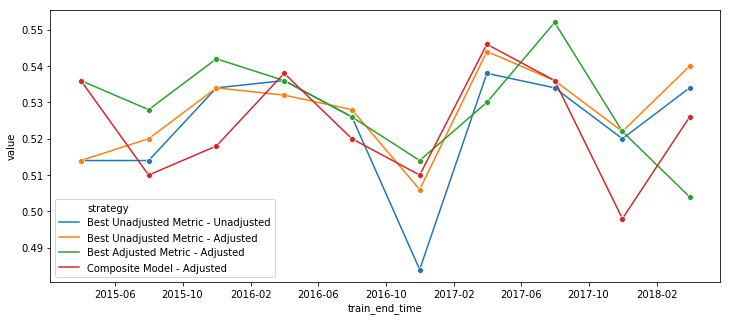

In [307]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax)

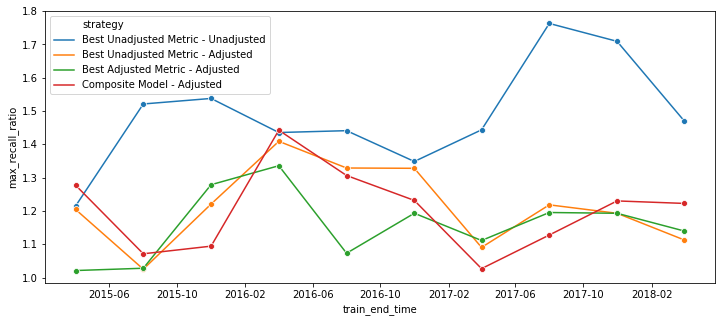

In [309]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='max_recall_ratio', hue='strategy', marker="o", ax=ax)

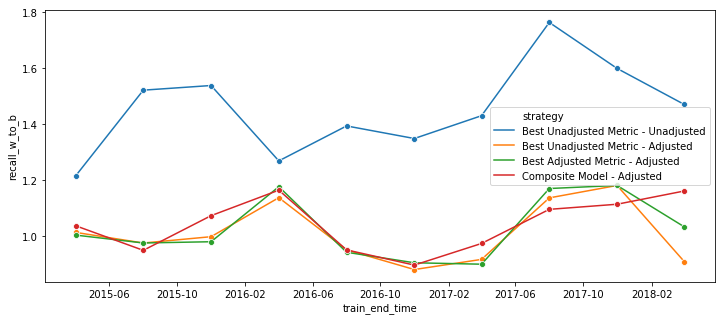

In [311]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

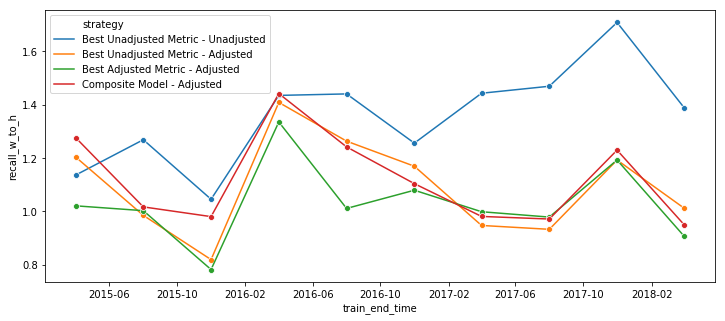

In [312]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

In [313]:
pd.read_sql("""
SELECT train_end_time, COUNT(*) AS num_models,
       AVG(base_frac_b) AS avg_base_frac_b, AVG(base_frac_w) AS avg_base_frac_w, AVG(base_frac_h) AS avg_base_frac_h,
       AVG(adj_frac_b) AS avg_adj_frac_b, AVG(adj_frac_w) AS avg_adj_frac_w, AVG(adj_frac_h) AS avg_adj_frac_h
FROM kit_bias_class_test.model_adjustment_results_race_3way
WHERE base_value >= 0.45
AND train_end_time > past_train_end_time
GROUP BY 1
ORDER BY 1 DESC;""", conn)

,train_end_time,num_models,avg_base_frac_b,avg_base_frac_w,avg_base_frac_h,avg_adj_frac_b,avg_adj_frac_w,avg_adj_frac_h
0,2018-04-01,58,0.340241,0.545483,0.114276,0.425966,0.423069,0.150966
1,2017-12-01,57,0.306105,0.565053,0.128842,0.387965,0.465544,0.146491
2,2017-08-01,57,0.315088,0.561895,0.123018,0.404772,0.430175,0.165053
3,2017-04-01,57,0.334035,0.532175,0.133789,0.437123,0.404456,0.158421
4,2016-12-01,56,0.317714,0.544357,0.137929,0.415679,0.459786,0.124536
5,2016-08-01,58,0.313483,0.544345,0.142172,0.425448,0.444103,0.130448
6,2016-04-01,57,0.354737,0.510035,0.135228,0.408316,0.469263,0.122421
7,2015-12-01,56,0.320500,0.541714,0.137786,0.404214,0.445571,0.150214
8,2015-08-01,56,0.310464,0.568107,0.121429,0.431964,0.426857,0.141179
9,2015-04-01,57,0.358456,0.524246,0.117298,0.417474,0.468667,0.113860


A bit better, but actually didn't move as much as I'd hoped. Let's try again with a smaller weight.

Separately, might be interesting to consider a bootstrap here as well -- sample with replacement to the same overall size and see how much fluctuation we see across the groups?

In [315]:
reload(ra)
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='johnson_county_ddj_write',
        schema='kit_bias_class_test',
        experiment_hashes='09b3bcab5a6e1eb1c712571f6a5abb75',
        date_pairs=date_pairs,
        list_sizes=[500],
        #entity_demos='joco',
        entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_3way',
        sample_weights={'W': 0.3, 'B': 0.6}
)

pd.read_sql("""
SELECT train_end_time, COUNT(*) AS num_models,
       AVG(base_frac_b) AS avg_base_frac_b, AVG(base_frac_w) AS avg_base_frac_w, AVG(base_frac_h) AS avg_base_frac_h,
       AVG(adj_frac_b) AS avg_adj_frac_b, AVG(adj_frac_w) AS avg_adj_frac_w, AVG(adj_frac_h) AS avg_adj_frac_h
FROM kit_bias_class_test.model_adjustment_results_race_3way
WHERE base_value >= 0.45
AND train_end_time > past_train_end_time
GROUP BY 1
ORDER BY 1 DESC;""", conn)

,train_end_time,num_models,avg_base_frac_b,avg_base_frac_w,avg_base_frac_h,avg_adj_frac_b,avg_adj_frac_w,avg_adj_frac_h
0,2018-04-01,56,0.312643,0.505893,0.181464,0.382000,0.395143,0.222857
1,2017-12-01,49,0.292082,0.525714,0.182204,0.301429,0.471878,0.226694
2,2017-08-01,56,0.302714,0.494929,0.202357,0.396893,0.373643,0.229464
3,2017-04-01,56,0.317321,0.501286,0.181393,0.382143,0.394750,0.223107
4,2016-12-01,37,0.294649,0.505459,0.199892,0.355622,0.448595,0.195784
5,2016-08-01,24,0.299833,0.492917,0.207250,0.388583,0.408833,0.202583
6,2016-04-01,56,0.321714,0.471464,0.206821,0.411857,0.388929,0.199214
7,2015-12-01,49,0.306898,0.487020,0.206082,0.343347,0.440653,0.216000
8,2015-08-01,49,0.313878,0.498898,0.187224,0.380367,0.414408,0.205224
9,2015-04-01,56,0.355857,0.467143,0.177000,0.396786,0.416964,0.186250


In [316]:
ts_df2 = pd.read_sql(sql, conn)

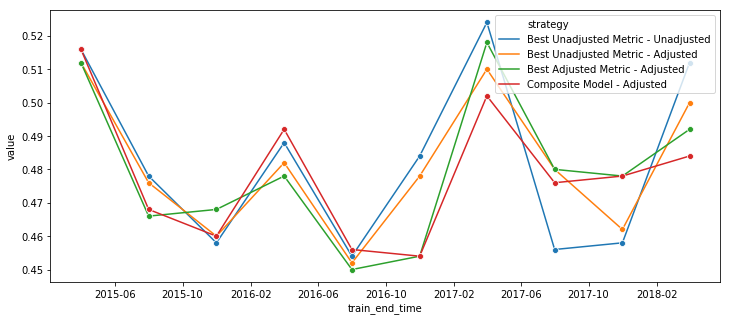

In [317]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax)

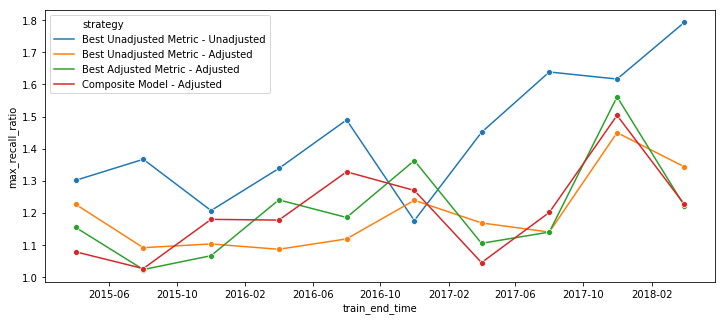

In [318]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='max_recall_ratio', hue='strategy', marker="o", ax=ax)

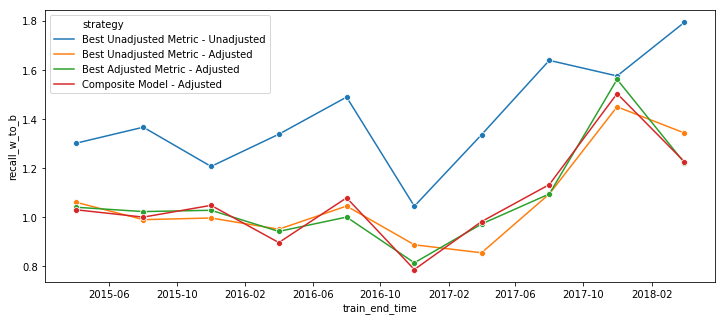

In [319]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

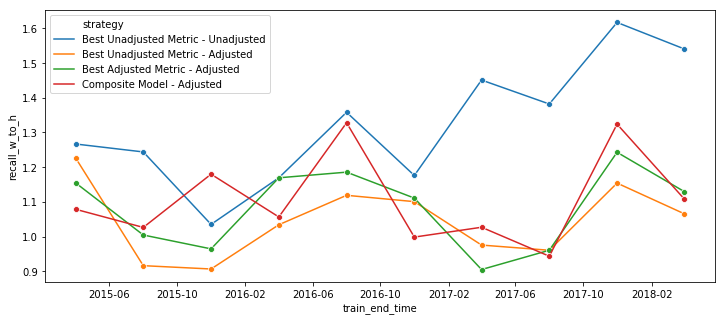

In [320]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_df2, x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

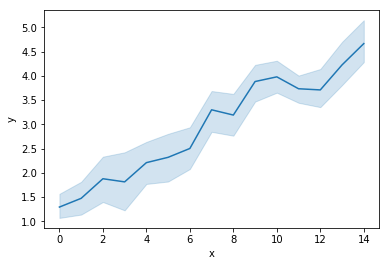

In [332]:
import random
res = []
for i in range(10):
    x = range(15)
    y = [0.25*xi + 2.5*random.random() for xi in x]
    df = pd.DataFrame({'x': x, 'y': y})
    df['trial'] = i
    res.append(df)
all_res = pd.concat(res)
sns.lineplot(data=all_res, x='x', y='y')

In [333]:
import pickle
with open('multi_sample.pkl', 'rb') as f:
    smpl_dfs = pickle.load(f)

In [334]:
smpl_dfs.keys()

dict_keys(['fracs', 'ts'])

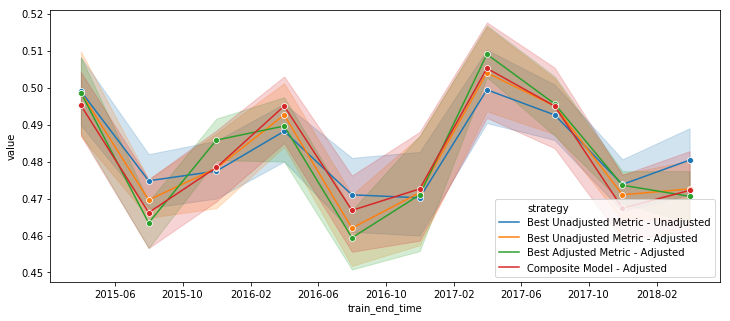

In [335]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['ts'], x='train_end_time', y='value', hue='strategy', marker="o", ax=ax)

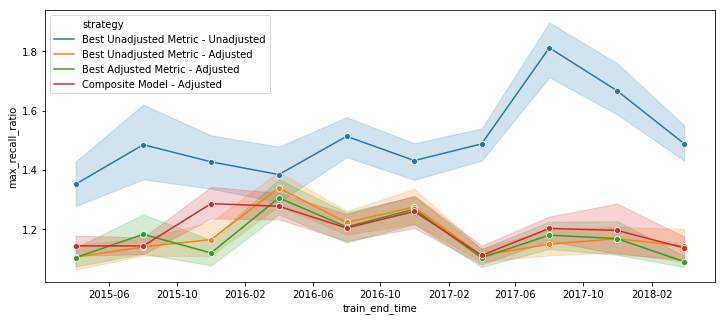

In [336]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['ts'], x='train_end_time', y='max_recall_ratio', hue='strategy', marker="o", ax=ax)

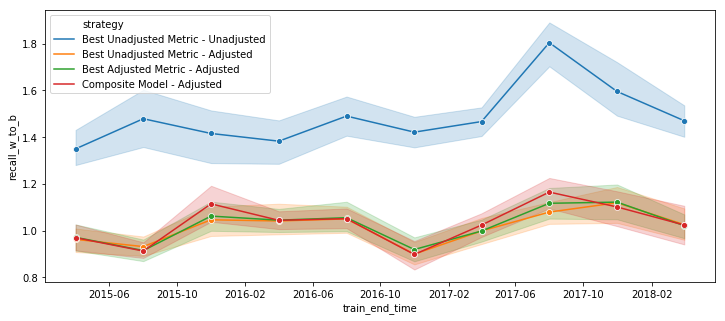

In [337]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['ts'], x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

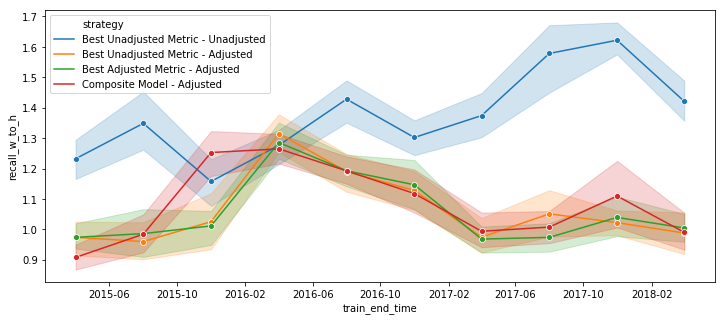

In [338]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['ts'], x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

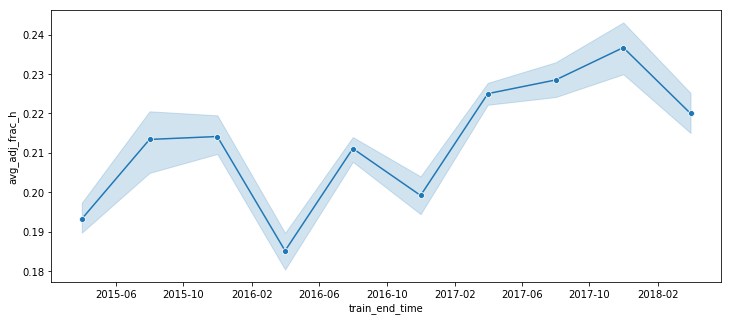

In [341]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['fracs'], x='train_end_time', y='avg_adj_frac_h', marker="o", ax=ax)

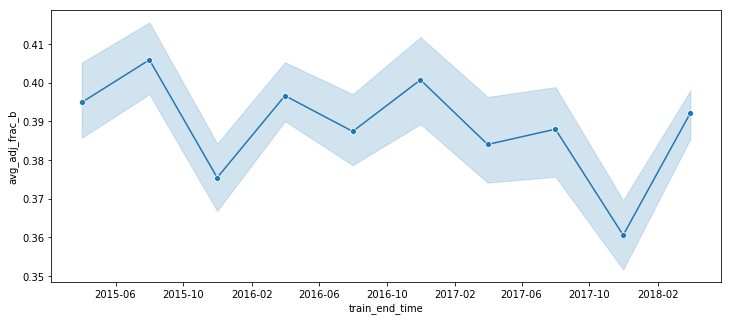

In [342]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=smpl_dfs['fracs'], x='train_end_time', y='avg_adj_frac_b', marker="o", ax=ax)